In [5]:
from google.colab import files
upload = files.upload()

Saving book.csv to book.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
df=pd.read_csv("book.csv",encoding = 'latin1')
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


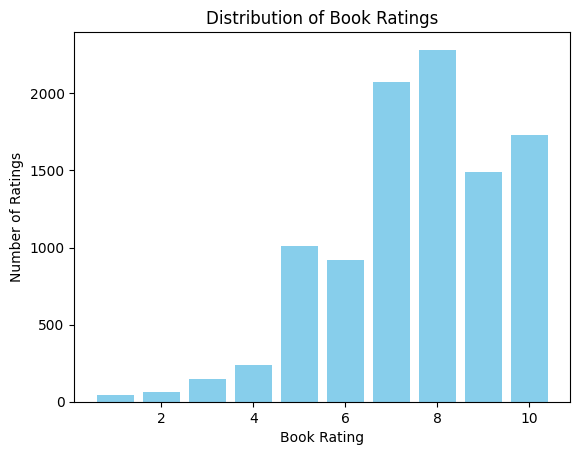

In [7]:
#distribution of ratings
import matplotlib.pyplot as plt

ratings_distribution = df['Book.Rating'].value_counts().sort_index()

plt.bar(ratings_distribution.index, ratings_distribution.values, color='skyblue')
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Book Ratings')
plt.show()
#ratings_distribution.index are the unique ratings in the dataset.
#ratings_distribution.values are the counts of each unique rating.


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample movie data
df=pd.read_csv("book.csv",encoding = 'latin1')
df

# Assuming our data is stored in a DataFrame called df
titles = df['Book.Title'].fillna('')  # Replace NaN values with an empty string

# Use TfidfVectorizer instead of CountVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
title_matrix = vectorizer.fit_transform(titles)

# title_matrix now contains the TF-IDF representation of book titles




In [9]:
# Step 2: Compute cosine similarity between items (Books)
#Cosine Similarity Matrix: The cosine similarity is computed between items (Books) based on their Title vectors.
cosine_sim_matrix = cosine_similarity(title_matrix, title_matrix)

In [10]:
def get_book_recommendations(Book_Title, cosine_sim_matrix, Book_df):
    Book_index = Book_df[Book_df['Book.Title'] == Book_Title].index[0]
    sim_scores = list(enumerate(cosine_sim_matrix[Book_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:3]  # Get the top 2 similar books (excluding itself)

    Book_indices = [i[0] for i in sim_scores]
    recommended_Books = Book_df['Book.Title'].iloc[Book_indices]

    return recommended_Books


In [11]:
# Example: Get book recommendations for 'Cannibal In Manhattan'
Book_title = 'Cannibal In Manhattan'
recommendations = get_book_recommendations(Book_title, cosine_sim_matrix, df)

print(f"Recommendations for '{Book_title}':")
print(recommendations)


Recommendations for 'Cannibal In Manhattan':
4186               Manhattan Memoir
9896    Manhattan, When I Was Young
Name: Book.Title, dtype: object
